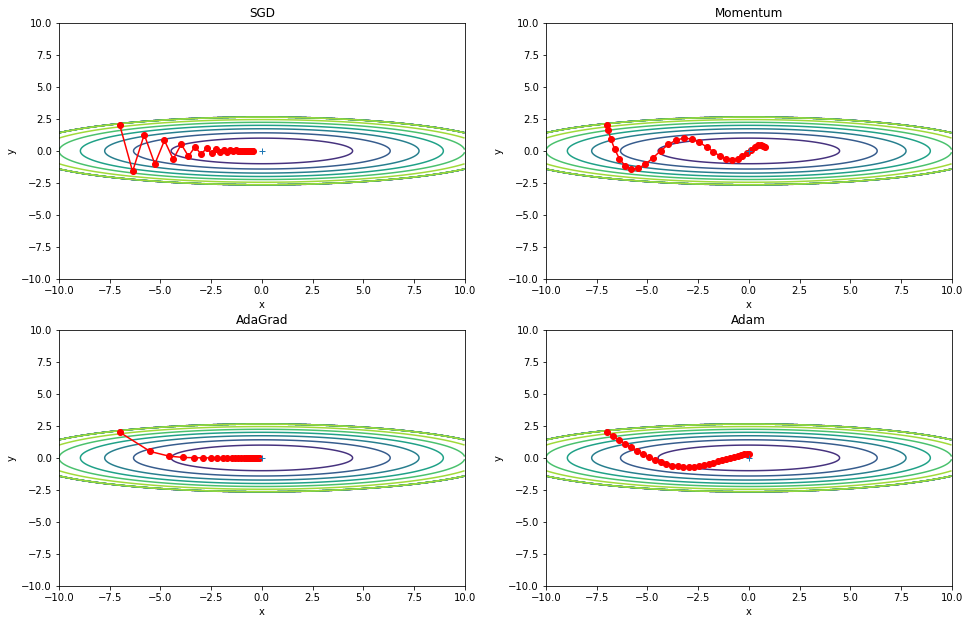

In [9]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *

plt.figure(figsize=(16, 16))

# def f(x, y):
#     return x**2  + y**2


# def df(x, y):
#     return 2.0*x , 2.0*y

def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

# init_pos = (0.0, 2.5)
init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.9)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
# optimizers["RMSprop"] = RMSprop(lr=0.2)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(3, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)

#     plt.ylim(-5, 5)
#     plt.xlim(-5, 5)

    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

===========iteration:0===========
SGD:2.447441344429516
Momentum:2.4220652933095375
AdaGrad:2.19195409244998
Adam:2.272849075245128
===========iteration:100===========
SGD:1.4632849417037477
Momentum:0.3382037683775918
AdaGrad:0.09559440569643826
Adam:0.1919486790119915
===========iteration:200===========
SGD:0.8215932811498
Momentum:0.2998366048319533
AdaGrad:0.09901178776715386
Adam:0.1850038083755012
===========iteration:300===========
SGD:0.5760921968081578
Momentum:0.20990041266902604
AdaGrad:0.09190582564498284
Adam:0.12152939224959894
===========iteration:400===========
SGD:0.5427346589647196
Momentum:0.2662792380966252
AdaGrad:0.08909652940082785
Adam:0.13647452803323534
===========iteration:500===========
SGD:0.4417835906999519
Momentum:0.18907234578397658
AdaGrad:0.07656833711134253
Adam:0.09769243953892474
===========iteration:600===========
SGD:0.2278554624233069
Momentum:0.06878309066718374
AdaGrad:0.026192211704603785
Adam:0.04003020586799275
===========iteration:700=====

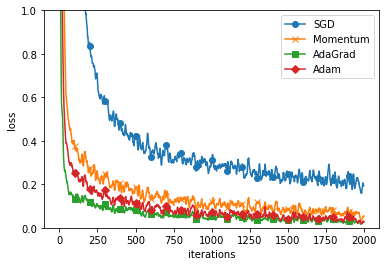

In [10]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

In [38]:
import numpy as np
import matplotlib.pyplot as plt

a = np.random.randn(300,300)
print(a.shape)
# print(a)
print(np.mean(a))
print(np.std(a))

(300, 300)
0.0023359936451485207
0.9990513181563059


(1000, 100)


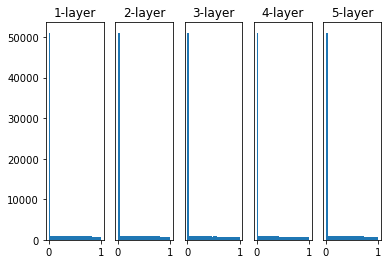

In [56]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
print(input_data.shape)
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
#     w = np.random.randn(node_num, node_num) * 1
#     w = np.random.randn(node_num, node_num) * 0.01
#     w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)
    
    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
#     z = sigmoid(a)
    z = ReLU(a)
#     z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

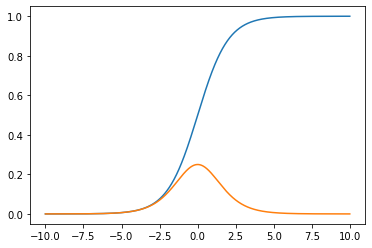

In [45]:
def sigmoid(x):
    y = 1/(1+np.exp(-x))
    return y

x = np.arange(-10, 10, 0.01)
y = sigmoid(x)
z = y*(1-y)
plt.plot(x,y)
plt.plot(x,z)
plt.show()

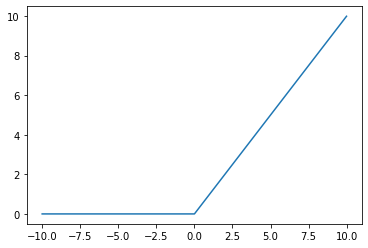

In [52]:
def Relu(x):
    y = np.maximum(0,x)
    return y

x = np.arange(-10, 10, 0.01)
y = Relu(x)
plt.plot(x,y)
plt.show()

===========iteration:0===========
std=0.01:2.302513193817342
Xavier:2.3000373246378727
He:2.3005669576665504
===========iteration:100===========
std=0.01:2.302735711643026
Xavier:2.2605640834384118
He:1.4672477007845726
===========iteration:200===========
std=0.01:2.3019195729683775
Xavier:2.1794343543562795
He:0.7496140097112544
===========iteration:300===========
std=0.01:2.3020102297021623
Xavier:2.0456618136280618
He:0.609634755874787
===========iteration:400===========
std=0.01:2.304176674064573
Xavier:1.69324407808153
He:0.490526508113817
===========iteration:500===========
std=0.01:2.3026743351225143
Xavier:1.1869188610986638
He:0.4614777950783986
===========iteration:600===========
std=0.01:2.2974654027524406
Xavier:0.7584233308132907
He:0.32745810574779294
===========iteration:700===========
std=0.01:2.303216443508006
Xavier:0.6988546407222429
He:0.3677972919310583
===========iteration:800===========
std=0.01:2.307609812831469
Xavier:0.5121427132389362
He:0.2960625815988695
==

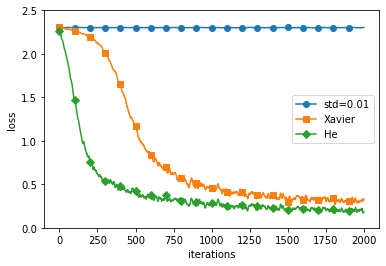

In [57]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

In [81]:
x = np.arange(-10000,10000)
mean = np.mean(x)
std = np.std(x)
xn = (x - mean) / std
gamma=0.5
beta=3
out = xn*gamma + beta
print(np.mean(out))
print(np.std(out))

2.9999999999999996
0.5


In [40]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend

plt.figure(figsize=(16, 16))
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100], output_size=10,
                              use_batchnorm=True)

x_batch = x_train[:1]
t_batch = t_train[:1]

grad_backprop = network.gradient(x_batch, t_batch)
grad_numerical = network.numerical_gradient(x_batch, t_batch)


for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

W1:0.0
b1:0.0
gamma1:0.0
beta1:0.0
W2:0.0
b2:0.0
gamma2:0.0
beta2:0.05076381372290939
W3:0.0
b3:1.7990402263745597e-07


<Figure size 1152x1152 with 0 Axes>

In [89]:
a = np.logspace(0, 10, num=10, base=2)
a

array([1.00000000e+00, 2.16011948e+00, 4.66611616e+00, 1.00793684e+01,
       2.17726400e+01, 4.70315038e+01, 1.01593667e+02, 2.19454460e+02,
       4.74047853e+02, 1.02400000e+03])

In [90]:
a = np.logspace(0, -4, num=16, base=10)
a

array([1.00000000e+00, 5.41169527e-01, 2.92864456e-01, 1.58489319e-01,
       8.57695899e-02, 4.64158883e-02, 2.51188643e-02, 1.35935639e-02,
       7.35642254e-03, 3.98107171e-03, 2.15443469e-03, 1.16591440e-03,
       6.30957344e-04, 3.41454887e-04, 1.84784980e-04, 1.00000000e-04])

### 배치 정규화

In [85]:
a = np.logspace(0, 4, num=4)
print(a)

[1.00000000e+00 2.15443469e+01 4.64158883e+02 1.00000000e+04]


============== 1/16 ==============
epoch:0 | 0.087 - 0.104
epoch:1 | 0.097 - 0.142


..\common\functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)


epoch:2 | 0.097 - 0.145
epoch:3 | 0.097 - 0.157
epoch:4 | 0.097 - 0.168
epoch:5 | 0.097 - 0.197
epoch:6 | 0.097 - 0.221
epoch:7 | 0.097 - 0.234
epoch:8 | 0.097 - 0.252
epoch:9 | 0.097 - 0.27
epoch:10 | 0.097 - 0.28
epoch:11 | 0.097 - 0.296
epoch:12 | 0.097 - 0.326
epoch:13 | 0.097 - 0.347
epoch:14 | 0.097 - 0.352
epoch:15 | 0.097 - 0.374
epoch:16 | 0.097 - 0.385
epoch:17 | 0.097 - 0.392


No handles with labels found to put in legend.


epoch:18 | 0.097 - 0.406
epoch:19 | 0.097 - 0.431
============== 2/16 ==============
epoch:0 | 0.1 - 0.153


..\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
..\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.097 - 0.127
epoch:2 | 0.097 - 0.127
epoch:3 | 0.097 - 0.15
epoch:4 | 0.097 - 0.155
epoch:5 | 0.097 - 0.183
epoch:6 | 0.097 - 0.212
epoch:7 | 0.097 - 0.24
epoch:8 | 0.097 - 0.269
epoch:9 | 0.097 - 0.298
epoch:10 | 0.097 - 0.334
epoch:11 | 0.097 - 0.346
epoch:12 | 0.097 - 0.368
epoch:13 | 0.097 - 0.382
epoch:14 | 0.097 - 0.409
epoch:15 | 0.097 - 0.429
epoch:16 | 0.097 - 0.45
epoch:17 | 0.097 - 0.466
epoch:18 | 0.097 - 0.488


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.501
============== 3/16 ==============
epoch:0 | 0.12 - 0.114
epoch:1 | 0.394 - 0.108
epoch:2 | 0.541 - 0.153
epoch:3 | 0.616 - 0.194
epoch:4 | 0.645 - 0.227
epoch:5 | 0.704 - 0.268
epoch:6 | 0.743 - 0.308
epoch:7 | 0.808 - 0.344
epoch:8 | 0.851 - 0.378
epoch:9 | 0.889 - 0.412
epoch:10 | 0.912 - 0.449
epoch:11 | 0.928 - 0.481
epoch:12 | 0.94 - 0.501
epoch:13 | 0.959 - 0.54
epoch:14 | 0.97 - 0.554
epoch:15 | 0.97 - 0.569
epoch:16 | 0.976 - 0.59
epoch:17 | 0.98 - 0.608


No handles with labels found to put in legend.


epoch:18 | 0.983 - 0.623
epoch:19 | 0.986 - 0.633
============== 4/16 ==============
epoch:0 | 0.143 - 0.16
epoch:1 | 0.259 - 0.174
epoch:2 | 0.42 - 0.207
epoch:3 | 0.531 - 0.295
epoch:4 | 0.594 - 0.351
epoch:5 | 0.644 - 0.412
epoch:6 | 0.669 - 0.474
epoch:7 | 0.707 - 0.526
epoch:8 | 0.734 - 0.56
epoch:9 | 0.752 - 0.595
epoch:10 | 0.761 - 0.635
epoch:11 | 0.781 - 0.645
epoch:12 | 0.795 - 0.676
epoch:13 | 0.8 - 0.692
epoch:14 | 0.824 - 0.716
epoch:15 | 0.823 - 0.729
epoch:16 | 0.845 - 0.751
epoch:17 | 0.835 - 0.769
epoch:18 | 0.853 - 0.778
epoch:19 | 0.857 - 0.794


No handles with labels found to put in legend.


============== 5/16 ==============
epoch:0 | 0.11 - 0.092
epoch:1 | 0.112 - 0.14
epoch:2 | 0.119 - 0.322
epoch:3 | 0.118 - 0.439
epoch:4 | 0.124 - 0.519
epoch:5 | 0.138 - 0.581
epoch:6 | 0.147 - 0.632
epoch:7 | 0.151 - 0.651
epoch:8 | 0.165 - 0.672
epoch:9 | 0.153 - 0.708
epoch:10 | 0.169 - 0.728
epoch:11 | 0.174 - 0.754
epoch:12 | 0.187 - 0.775
epoch:13 | 0.188 - 0.792
epoch:14 | 0.201 - 0.802
epoch:15 | 0.204 - 0.824
epoch:16 | 0.21 - 0.836
epoch:17 | 0.227 - 0.85


No handles with labels found to put in legend.


epoch:18 | 0.23 - 0.863
epoch:19 | 0.235 - 0.873
============== 6/16 ==============
epoch:0 | 0.089 - 0.12
epoch:1 | 0.118 - 0.217
epoch:2 | 0.128 - 0.458
epoch:3 | 0.121 - 0.529
epoch:4 | 0.115 - 0.576
epoch:5 | 0.116 - 0.625
epoch:6 | 0.119 - 0.672
epoch:7 | 0.117 - 0.718
epoch:8 | 0.172 - 0.751
epoch:9 | 0.134 - 0.789
epoch:10 | 0.116 - 0.819
epoch:11 | 0.116 - 0.851
epoch:12 | 0.117 - 0.868
epoch:13 | 0.117 - 0.889
epoch:14 | 0.117 - 0.896
epoch:15 | 0.126 - 0.904
epoch:16 | 0.127 - 0.909
epoch:17 | 0.13 - 0.917
epoch:18 | 0.13 - 0.933


No handles with labels found to put in legend.


epoch:19 | 0.131 - 0.941
============== 7/16 ==============
epoch:0 | 0.102 - 0.103
epoch:1 | 0.117 - 0.33
epoch:2 | 0.117 - 0.599
epoch:3 | 0.105 - 0.7
epoch:4 | 0.117 - 0.767
epoch:5 | 0.116 - 0.825
epoch:6 | 0.116 - 0.856
epoch:7 | 0.117 - 0.89
epoch:8 | 0.117 - 0.904
epoch:9 | 0.116 - 0.917
epoch:10 | 0.117 - 0.927
epoch:11 | 0.117 - 0.945
epoch:12 | 0.117 - 0.955
epoch:13 | 0.117 - 0.964
epoch:14 | 0.117 - 0.971
epoch:15 | 0.117 - 0.972
epoch:16 | 0.117 - 0.978
epoch:17 | 0.117 - 0.983
epoch:18 | 0.117 - 0.987
epoch:19 | 0.117 - 0.99


No handles with labels found to put in legend.


============== 8/16 ==============
epoch:0 | 0.093 - 0.099
epoch:1 | 0.117 - 0.431
epoch:2 | 0.117 - 0.698
epoch:3 | 0.117 - 0.791
epoch:4 | 0.117 - 0.85
epoch:5 | 0.116 - 0.894
epoch:6 | 0.116 - 0.925
epoch:7 | 0.116 - 0.947
epoch:8 | 0.116 - 0.957
epoch:9 | 0.117 - 0.97
epoch:10 | 0.116 - 0.973
epoch:11 | 0.116 - 0.982
epoch:12 | 0.116 - 0.986
epoch:13 | 0.116 - 0.993
epoch:14 | 0.117 - 0.994
epoch:15 | 0.117 - 0.997
epoch:16 | 0.117 - 0.998
epoch:17 | 0.117 - 0.998
epoch:18 | 0.117 - 0.998


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.999
============== 9/16 ==============
epoch:0 | 0.117 - 0.095
epoch:1 | 0.117 - 0.472
epoch:2 | 0.116 - 0.734
epoch:3 | 0.116 - 0.802
epoch:4 | 0.117 - 0.846
epoch:5 | 0.117 - 0.911
epoch:6 | 0.117 - 0.953
epoch:7 | 0.117 - 0.961
epoch:8 | 0.117 - 0.978
epoch:9 | 0.117 - 0.988
epoch:10 | 0.117 - 0.994
epoch:11 | 0.117 - 0.994
epoch:12 | 0.117 - 0.992
epoch:13 | 0.117 - 0.996
epoch:14 | 0.117 - 0.996
epoch:15 | 0.117 - 0.999
epoch:16 | 0.117 - 0.999
epoch:17 | 0.117 - 0.999
epoch:18 | 0.117 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.094 - 0.174
epoch:1 | 0.117 - 0.501
epoch:2 | 0.117 - 0.796
epoch:3 | 0.117 - 0.88
epoch:4 | 0.117 - 0.924
epoch:5 | 0.117 - 0.962
epoch:6 | 0.117 - 0.967
epoch:7 | 0.117 - 0.972
epoch:8 | 0.117 - 0.99
epoch:9 | 0.117 - 0.993
epoch:10 | 0.117 - 0.994
epoch:11 | 0.117 - 0.997
epoch:12 | 0.117 - 0.997
epoch:13 | 0.117 - 0.997
epoch:14 | 0.117 - 0.997
epoch:15 | 0.117 - 0.998
epoch:16 | 0.117 - 0.999
epoch:17 | 0.117 - 0.999
epoch:18 | 0.116 - 0.999


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.978
============== 11/16 ==============
epoch:0 | 0.116 - 0.23
epoch:1 | 0.116 - 0.401
epoch:2 | 0.116 - 0.663
epoch:3 | 0.116 - 0.669
epoch:4 | 0.116 - 0.744
epoch:5 | 0.116 - 0.759
epoch:6 | 0.116 - 0.762
epoch:7 | 0.116 - 0.789
epoch:8 | 0.117 - 0.782
epoch:9 | 0.117 - 0.791
epoch:10 | 0.117 - 0.776
epoch:11 | 0.117 - 0.784
epoch:12 | 0.117 - 0.797
epoch:13 | 0.117 - 0.798
epoch:14 | 0.117 - 0.8
epoch:15 | 0.117 - 0.801
epoch:16 | 0.117 - 0.801
epoch:17 | 0.117 - 0.802
epoch:18 | 0.117 - 0.731
epoch:19 | 0.117 - 0.801


No handles with labels found to put in legend.


============== 12/16 ==============
epoch:0 | 0.116 - 0.232
epoch:1 | 0.116 - 0.57
epoch:2 | 0.116 - 0.589
epoch:3 | 0.116 - 0.838
epoch:4 | 0.116 - 0.815
epoch:5 | 0.116 - 0.901
epoch:6 | 0.117 - 0.879
epoch:7 | 0.117 - 0.93
epoch:8 | 0.117 - 0.954
epoch:9 | 0.117 - 0.953
epoch:10 | 0.117 - 0.755
epoch:11 | 0.117 - 0.985
epoch:12 | 0.117 - 0.988
epoch:13 | 0.117 - 0.983
epoch:14 | 0.117 - 0.993
epoch:15 | 0.117 - 0.993
epoch:16 | 0.117 - 0.955
epoch:17 | 0.117 - 0.987


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.99
epoch:19 | 0.117 - 0.994
============== 13/16 ==============
epoch:0 | 0.116 - 0.098
epoch:1 | 0.117 - 0.443
epoch:2 | 0.117 - 0.523
epoch:3 | 0.117 - 0.451
epoch:4 | 0.116 - 0.584
epoch:5 | 0.116 - 0.588
epoch:6 | 0.116 - 0.613
epoch:7 | 0.116 - 0.608
epoch:8 | 0.116 - 0.625
epoch:9 | 0.116 - 0.679
epoch:10 | 0.116 - 0.732
epoch:11 | 0.116 - 0.775
epoch:12 | 0.116 - 0.72
epoch:13 | 0.116 - 0.772
epoch:14 | 0.117 - 0.756
epoch:15 | 0.117 - 0.765
epoch:16 | 0.116 - 0.733
epoch:17 | 0.116 - 0.715
epoch:18 | 0.116 - 0.723
epoch:19 | 0.116 - 0.722


No handles with labels found to put in legend.


============== 14/16 ==============
epoch:0 | 0.094 - 0.112
epoch:1 | 0.116 - 0.402
epoch:2 | 0.116 - 0.552
epoch:3 | 0.116 - 0.549
epoch:4 | 0.116 - 0.543
epoch:5 | 0.116 - 0.601
epoch:6 | 0.116 - 0.598
epoch:7 | 0.116 - 0.608
epoch:8 | 0.117 - 0.602
epoch:9 | 0.117 - 0.54
epoch:10 | 0.116 - 0.608
epoch:11 | 0.116 - 0.609
epoch:12 | 0.116 - 0.611
epoch:13 | 0.116 - 0.611
epoch:14 | 0.117 - 0.611
epoch:15 | 0.117 - 0.614
epoch:16 | 0.117 - 0.612
epoch:17 | 0.117 - 0.614
epoch:18 | 0.117 - 0.614


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.614
============== 15/16 ==============
epoch:0 | 0.116 - 0.186
epoch:1 | 0.117 - 0.249
epoch:2 | 0.117 - 0.141
epoch:3 | 0.116 - 0.424
epoch:4 | 0.117 - 0.467
epoch:5 | 0.117 - 0.499
epoch:6 | 0.117 - 0.494
epoch:7 | 0.117 - 0.3
epoch:8 | 0.117 - 0.509
epoch:9 | 0.117 - 0.519
epoch:10 | 0.117 - 0.514
epoch:11 | 0.117 - 0.526
epoch:12 | 0.117 - 0.532
epoch:13 | 0.116 - 0.522
epoch:14 | 0.117 - 0.518
epoch:15 | 0.117 - 0.53
epoch:16 | 0.116 - 0.609
epoch:17 | 0.117 - 0.608


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.614
epoch:19 | 0.116 - 0.614
============== 16/16 ==============
epoch:0 | 0.116 - 0.152
epoch:1 | 0.117 - 0.263
epoch:2 | 0.117 - 0.409
epoch:3 | 0.117 - 0.417
epoch:4 | 0.117 - 0.422
epoch:5 | 0.117 - 0.427
epoch:6 | 0.117 - 0.502
epoch:7 | 0.117 - 0.517
epoch:8 | 0.116 - 0.503
epoch:9 | 0.116 - 0.521
epoch:10 | 0.116 - 0.52
epoch:11 | 0.117 - 0.521
epoch:12 | 0.117 - 0.526
epoch:13 | 0.117 - 0.527
epoch:14 | 0.117 - 0.523
epoch:15 | 0.117 - 0.532
epoch:16 | 0.117 - 0.52
epoch:17 | 0.117 - 0.528
epoch:18 | 0.117 - 0.525
epoch:19 | 0.117 - 0.615


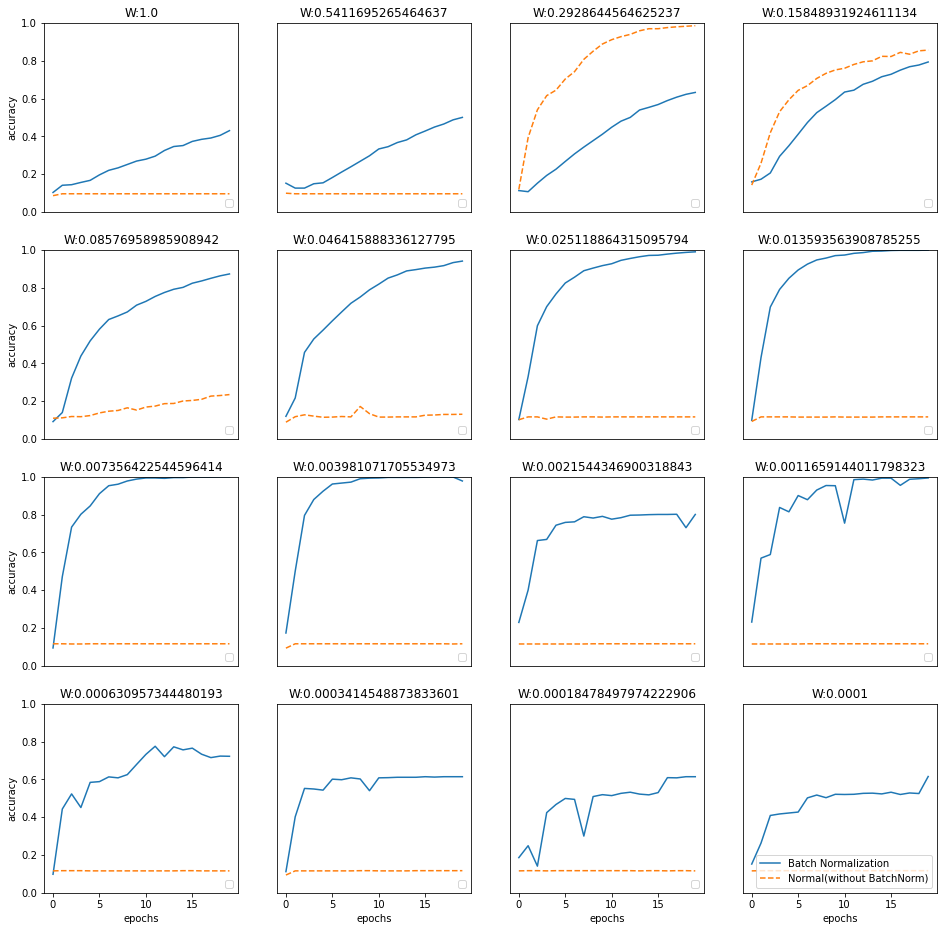

In [82]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

plt.figure(figsize=(16, 16))

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

### 오버 핏 재현 코드

epoch:0, train acc:0.16333333333333333, test acc:0.1312
epoch:1, train acc:0.16333333333333333, test acc:0.1419
epoch:2, train acc:0.21, test acc:0.1524
epoch:3, train acc:0.23333333333333334, test acc:0.1688
epoch:4, train acc:0.26, test acc:0.1865
epoch:5, train acc:0.3, test acc:0.2
epoch:6, train acc:0.30333333333333334, test acc:0.2093
epoch:7, train acc:0.31666666666666665, test acc:0.2244
epoch:8, train acc:0.3333333333333333, test acc:0.2355
epoch:9, train acc:0.34, test acc:0.2448
epoch:10, train acc:0.3566666666666667, test acc:0.2531
epoch:11, train acc:0.38333333333333336, test acc:0.2638
epoch:12, train acc:0.39, test acc:0.2735
epoch:13, train acc:0.39666666666666667, test acc:0.278
epoch:14, train acc:0.4266666666666667, test acc:0.2901
epoch:15, train acc:0.42333333333333334, test acc:0.2979
epoch:16, train acc:0.42333333333333334, test acc:0.3046
epoch:17, train acc:0.4266666666666667, test acc:0.3084
epoch:18, train acc:0.44, test acc:0.3169
epoch:19, train acc:0.47, 

epoch:158, train acc:0.89, test acc:0.7159
epoch:159, train acc:0.8833333333333333, test acc:0.7151
epoch:160, train acc:0.8866666666666667, test acc:0.7209
epoch:161, train acc:0.8766666666666667, test acc:0.715
epoch:162, train acc:0.88, test acc:0.7153
epoch:163, train acc:0.8833333333333333, test acc:0.7104
epoch:164, train acc:0.89, test acc:0.7188
epoch:165, train acc:0.8766666666666667, test acc:0.7105
epoch:166, train acc:0.8866666666666667, test acc:0.7124
epoch:167, train acc:0.8933333333333333, test acc:0.7217
epoch:168, train acc:0.8933333333333333, test acc:0.724
epoch:169, train acc:0.8833333333333333, test acc:0.7127
epoch:170, train acc:0.88, test acc:0.713
epoch:171, train acc:0.88, test acc:0.7182
epoch:172, train acc:0.8933333333333333, test acc:0.7137
epoch:173, train acc:0.8866666666666667, test acc:0.7132
epoch:174, train acc:0.89, test acc:0.7174
epoch:175, train acc:0.8766666666666667, test acc:0.7148
epoch:176, train acc:0.8866666666666667, test acc:0.7156
epoc

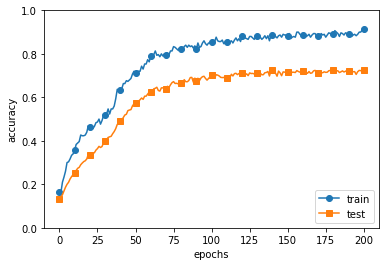

In [92]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
# weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 드롭 아웃 사용

In [95]:
x = (1,2)
print(*x)
# print(x)
# print(type(x))

1 2


In [100]:
x = np.random.rand(10000)
print(np.min(x), np.max(x), np.mean(x))

2.2851880993157714e-05 0.9997419665672143 0.4990956052806284


In [112]:
x=np.arange(10,35).reshape(5,5)
dout=np.ones(25).reshape(5,5)
print(x)
mask = np.random.rand(*x.shape) > 0.2
print(mask)
out = x * mask
print(out)
dout = dout * mask
print(dout)

[[10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]
 [30 31 32 33 34]]
[[ True  True  True  True  True]
 [ True False False  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True False False]]
[[10 11 12 13 14]
 [15  0  0 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]
 [30 31 32  0  0]]
[[1. 1. 1. 1. 1.]
 [1. 0. 0. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 0.]]


train loss:2.315826074397326
=== epoch:1, train acc:0.14, test acc:0.1291 ===
train loss:2.3179498090510533
train loss:2.304285356185728
train loss:2.304966211318846
=== epoch:2, train acc:0.14333333333333334, test acc:0.1311 ===
train loss:2.3027334127287964
train loss:2.3049385338277615
train loss:2.2916745169209314
=== epoch:3, train acc:0.14333333333333334, test acc:0.1304 ===
train loss:2.302415196279854
train loss:2.286702418371614
train loss:2.3008765613923616
=== epoch:4, train acc:0.14333333333333334, test acc:0.1331 ===
train loss:2.2842215123860474
train loss:2.3096497661402497
train loss:2.305253063268814
=== epoch:5, train acc:0.15333333333333332, test acc:0.1319 ===
train loss:2.30495094441284
train loss:2.295751101071819
train loss:2.289971057567071
=== epoch:6, train acc:0.15, test acc:0.1303 ===
train loss:2.289899827159192
train loss:2.2812849468917995
train loss:2.288508112047278
=== epoch:7, train acc:0.15333333333333332, test acc:0.1295 ===
train loss:2.30389390984

=== epoch:57, train acc:0.29333333333333333, test acc:0.2285 ===
train loss:2.2192508009982514
train loss:2.2210321287024146
train loss:2.2351186736589836
=== epoch:58, train acc:0.29333333333333333, test acc:0.2293 ===
train loss:2.1973411863509735
train loss:2.2195484983517706
train loss:2.210834644529899
=== epoch:59, train acc:0.29, test acc:0.2289 ===
train loss:2.2156923098975967
train loss:2.210300819503219
train loss:2.2143883901321026
=== epoch:60, train acc:0.2866666666666667, test acc:0.2276 ===
train loss:2.21273947264941
train loss:2.2175244669287695
train loss:2.239718958468985
=== epoch:61, train acc:0.3, test acc:0.233 ===
train loss:2.198245383459115
train loss:2.2055991279846254
train loss:2.221784794842687
=== epoch:62, train acc:0.30666666666666664, test acc:0.2335 ===
train loss:2.2152138586246277
train loss:2.2242955866938714
train loss:2.223272697063713
=== epoch:63, train acc:0.30333333333333334, test acc:0.233 ===
train loss:2.207112974053661
train loss:2.22460

=== epoch:113, train acc:0.37, test acc:0.2897 ===
train loss:2.1104482638574207
train loss:2.0585399058805898
train loss:2.068491573555473
=== epoch:114, train acc:0.38, test acc:0.2947 ===
train loss:2.0698455385644494
train loss:2.025638717813223
train loss:2.0355677802362484
=== epoch:115, train acc:0.37666666666666665, test acc:0.2988 ===
train loss:2.0669319969029383
train loss:2.12775456497955
train loss:2.0595067978960615
=== epoch:116, train acc:0.39, test acc:0.3083 ===
train loss:2.0606209995682203
train loss:2.0306901472313665
train loss:2.0082863289185098
=== epoch:117, train acc:0.38333333333333336, test acc:0.3079 ===
train loss:2.05076056577194
train loss:2.0739498453378675
train loss:2.0756502056764576
=== epoch:118, train acc:0.38666666666666666, test acc:0.3156 ===
train loss:2.038413670279303
train loss:2.0814400606304373
train loss:2.0907420432947252
=== epoch:119, train acc:0.38666666666666666, test acc:0.318 ===
train loss:2.028619158315769
train loss:2.027769323

=== epoch:168, train acc:0.47, test acc:0.401 ===
train loss:1.6799953212123813
train loss:1.7239018754828976
train loss:1.6591957369125072
=== epoch:169, train acc:0.4633333333333333, test acc:0.3974 ===
train loss:1.7920716135205024
train loss:1.729184695150852
train loss:1.6256208874533835
=== epoch:170, train acc:0.47, test acc:0.399 ===
train loss:1.6108580536319947
train loss:1.7217387704048353
train loss:1.7426343903768156
=== epoch:171, train acc:0.47333333333333333, test acc:0.3988 ===
train loss:1.700043603529852
train loss:1.7466511870640955
train loss:1.6916412846963393
=== epoch:172, train acc:0.4666666666666667, test acc:0.3979 ===
train loss:1.7318371220025466
train loss:1.6924836388773619
train loss:1.6778481323324548
=== epoch:173, train acc:0.4666666666666667, test acc:0.3992 ===
train loss:1.7399686517531598
train loss:1.6925121169249044
train loss:1.7380788648700467
=== epoch:174, train acc:0.4766666666666667, test acc:0.4033 ===
train loss:1.6543672256389526
train 

=== epoch:224, train acc:0.5666666666666667, test acc:0.4767 ===
train loss:1.3164948225925255
train loss:1.4074180060489394
train loss:1.2846327912917783
=== epoch:225, train acc:0.5833333333333334, test acc:0.4757 ===
train loss:1.3366235707936434
train loss:1.2796349430692704
train loss:1.3000517971586
=== epoch:226, train acc:0.5733333333333334, test acc:0.4759 ===
train loss:1.2125097293167364
train loss:1.3812138773944418
train loss:1.2658979832401516
=== epoch:227, train acc:0.5866666666666667, test acc:0.4765 ===
train loss:1.3120669574159518
train loss:1.3055020110923652
train loss:1.2694204153117605
=== epoch:228, train acc:0.5866666666666667, test acc:0.4698 ===
train loss:1.2704030357995515
train loss:1.21876730658483
train loss:1.4337305585266091
=== epoch:229, train acc:0.5766666666666667, test acc:0.4719 ===
train loss:1.3280332924079343
train loss:1.3170943715045653
train loss:1.239402264044548
=== epoch:230, train acc:0.5866666666666667, test acc:0.4752 ===
train loss:

=== epoch:279, train acc:0.6433333333333333, test acc:0.5235 ===
train loss:0.9819532419034157
train loss:0.9352561112334183
train loss:1.0790418891023945
=== epoch:280, train acc:0.6466666666666666, test acc:0.5248 ===
train loss:1.0493995747403597
train loss:1.048486069200434
train loss:1.0757615107885277
=== epoch:281, train acc:0.6533333333333333, test acc:0.527 ===
train loss:1.0691603993077177
train loss:0.9452572071328817
train loss:0.8362071873725614
=== epoch:282, train acc:0.6466666666666666, test acc:0.5221 ===
train loss:0.9699433700860961
train loss:1.0895832721752412
train loss:0.947525415526252
=== epoch:283, train acc:0.6533333333333333, test acc:0.527 ===
train loss:0.9487331774595
train loss:0.9295631772514309
train loss:0.9322929395913769
=== epoch:284, train acc:0.6633333333333333, test acc:0.5354 ===
train loss:0.9094522951879525
train loss:1.0160121966141027
train loss:0.9758834375796688
=== epoch:285, train acc:0.6566666666666666, test acc:0.538 ===
train loss:0.

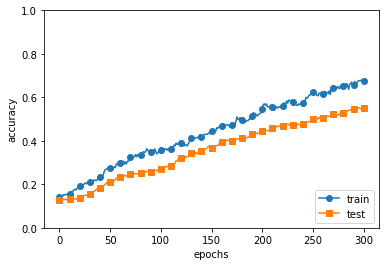

In [114]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
# use_dropout = False  # 드롭아웃을 쓰지 않을 때는 False
# dropout_ratio = 0.2
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [9]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

val acc:0.76 | lr:0.009148199165414608, weight decay:8.662597697273085e-06
val acc:0.13 | lr:0.0006936255480032815, weight decay:6.99591505427695e-05
val acc:0.07 | lr:7.50374092510703e-05, weight decay:2.136385282541291e-08
val acc:0.12 | lr:6.44737803725635e-06, weight decay:1.0755551923890743e-05
val acc:0.14 | lr:0.0005620055256653147, weight decay:2.057016177290107e-07
val acc:0.08 | lr:4.1881631002605094e-05, weight decay:5.694119296522235e-06
val acc:0.75 | lr:0.008057119100822125, weight decay:1.9857873177979526e-08
val acc:0.15 | lr:1.2216926461113917e-05, weight decay:2.3574866759128478e-08
val acc:0.11 | lr:1.0411642947497446e-06, weight decay:1.0226508484864606e-05
val acc:0.11 | lr:0.0003217100468845136, weight decay:1.3183528730543645e-07
val acc:0.23 | lr:0.00073669877727852, weight decay:6.399609300076623e-06
val acc:0.11 | lr:1.274647565262278e-05, weight decay:2.2693366390506056e-06
val acc:0.07 | lr:0.00020793235100092378, weight decay:1.6499231574945383e-05
val acc: